#### Imports

In [27]:
import netCDF4 as nc
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt

#### Open folder containing CDF files

In [12]:
folder_path = "/home/elise/Documents/M1-BIM/S2/Projet/IMOS_18_and_38_Hz"
list_cdf_files = []

# Create list of nc files
for filename in os.listdir(folder_path) :
    if filename.endswith('.nc') : 
        filepath = os.path.join(folder_path, filename)
        list_cdf_files.append(filepath)

#### Open CDF files

In [13]:
# File i
i = 0
cdf_file = list_cdf_files[i]

# Open file i
dataset=Dataset(cdf_file, mode='r')

#### Extract data from CDF file

In [24]:
# Show variables of CDF file
variable_names = list(dataset.variables.keys())
for var in variable_names :
    print (var)

TIME
DEPTH
CHANNEL
EV_FILENAME
LATITUDE
LATITUDE_quality_control
LONGITUDE
LONGITUDE_quality_control
mean_height
mean_height_quality_control
mean_depth
mean_depth_quality_control
Sv
Sv_quality_control
Sv_unfilt
Sv_unfilt_quality_control
Sv_pcnt_good
Sv_pcnt_good_quality_control
signal_noise
signal_noise_quality_control
background_noise
background_noise_quality_control
motion_correction_factor
motion_correction_factor_quality_control
amplifier_linearity_correction_factor
amplifier_linearity_correction_factor_quality_control
CARS_temperature
CARS_temperature_quality_control
CARS_salinity
CARS_salinity_quality_control
CARS_oxygen
CARS_oxygen_quality_control
CARS_nitrate
CARS_nitrate_quality_control
CARS_phosphate
CARS_phosphate_quality_control
CARS_silicate
CARS_silicate_quality_control
temperature
temperature_quality_control
salinity
salinity_quality_control
npp
npp_quality_control
abs_corrected_sv
abs_corrected_sv_quality_control
sound_speed
sound_speed_quality_control
absorption
absorp

In [33]:
latitude = dataset.variables['LATITUDE'][:]
longitude = dataset.variables['LONGITUDE'][:]
time = dataset.variables['TIME'][:] + nc.date2num(np.datetime64("1950-01-01"), units="days since 1950-01-01")
depth = dataset.variables.get('DEPTH', dataset.variables.get('RANGE', None))[:]
sv = dataset.variables['Sv'][:]

print(len(time)) # 31 162

ValueError: ('has_year_zero not specified', <class 'datetime.date'>)

#### Plot Echogram

TypeError: Invalid shape (2, 240, 31162) for image data

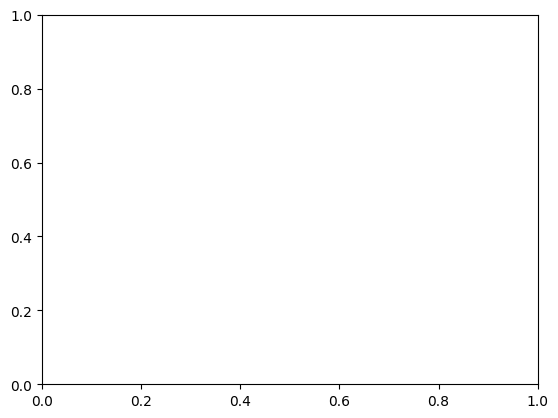

In [29]:
plt.figure()
plt.imshow(sv.T, aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Sv')
plt.title('Echogram: Sv')
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.show()

#### Close CDF file

In [6]:
dataset.close()